In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Import dan Preprocessing

In [2]:
df = pd.read_csv("DatasetAoL.csv")
df

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah target kasus tb,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Jumlah Penduduk Miskin (ribu),Persentase Penduduk Miskin,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus
0,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,83,12,"7,257","7,799",197776.311600,0.613343,2.358111,1.0,0.0
1,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,85,7,"7,432","7,823",202545.617700,0.628133,2.414976,0.0,0.0
2,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,31,8,"2,756",578,75109.758130,0.232930,0.895543,0.0,0.0
3,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,30,3,"2,647","1,891",72139.161750,0.223718,0.860124,0.0,0.0
4,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,70,3,"6,158","5,402",167825.069200,0.520458,2.000999,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262,JAKARTA BARAT,KEMBANGAN,MERUYA UTARA,33402,8033,"55,924","13,033",10011.108180,1.873261,0.070469,1.0,NaN
263,JAKARTA BARAT,KEMBANGAN,MERUYA SELATAN,41749,10040,"42,150","13,127",13113.677640,2.453808,0.092308,NaN,NaN
264,JAKARTA BARAT,KEMBANGAN,SRENGSENG,58025,13955,"58,583","12,753",10124.134390,1.894410,0.071264,NaN,NaN
265,JAKARTA BARAT,KEMBANGAN,JOGLO,123030,29588,"52,555","11,471",4895.918665,0.916116,0.034463,NaN,NaN


#### Menampilkan informasi basic

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (267, 12)


#### Mencari jumlah missing values

In [4]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
nama_kabupaten_kota                         0
nama_kecamatan                              0
nama_kelurahan                              0
jumlah target kasus tb                      0
jumlah penderita tb                         0
jumlah_penduduk_wni_wna                     0
jumlah_kepadatan                            0
Garis Kemiskinan (rupiah/kapita/bulan)      0
Jumlah Penduduk Miskin (ribu)               0
Persentase Penduduk Miskin                  0
Jumlah Rumah Sakit Umum                    96
Jumlah Rumah Sakit Khusus                 133
dtype: int64


#### Mengisi kolom 'Jumlah Rumah Sakit Umum' dan 'Jumlah Rumah Sakit Khusus' dengan angka 0

In [5]:
df[['Jumlah Rumah Sakit Umum', 'Jumlah Rumah Sakit Khusus']] = df[['Jumlah Rumah Sakit Umum', 'Jumlah Rumah Sakit Khusus']].fillna(0)

#### Menghasilkan statistik deskriptif dalam dataframe

In [6]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       jumlah target kasus tb  jumlah penderita tb  \
count              267.000000           267.000000   
mean              3472.138577           808.588015   
std              10394.223643          2504.227311   
min                 30.000000             3.000000   
25%                861.000000           198.000000   
50%               1686.000000           345.000000   
75%               2601.500000           569.000000   
max             123030.000000         29588.000000   

       Garis Kemiskinan (rupiah/kapita/bulan)  Jumlah Penduduk Miskin (ribu)  \
count                              267.000000                     267.000000   
mean                             26418.084921                       3.765658   
std                              26283.108985                       3.973534   
min                               1121.220004                       0.124217   
25%                              12589.491185                       1.079793   
50%        

#### Mengonversi dan membersihkan kolom 'jumlah_penduduk_wni_wna' dan 'jumlah_kepadatan' yang mungkin berisi nilai numerik dalam format string, termasuk koma sebagai pemisah ribuan.

In [7]:
cols_to_convert = ['jumlah_penduduk_wni_wna', 'jumlah_kepadatan']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
df

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah target kasus tb,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Jumlah Penduduk Miskin (ribu),Persentase Penduduk Miskin,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus
0,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,83,12,7257,7799,197776.311600,0.613343,2.358111,1.0,0.0
1,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,85,7,7432,7823,202545.617700,0.628133,2.414976,0.0,0.0
2,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,31,8,2756,578,75109.758130,0.232930,0.895543,0.0,0.0
3,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,30,3,2647,1891,72139.161750,0.223718,0.860124,0.0,0.0
4,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,70,3,6158,5402,167825.069200,0.520458,2.000999,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262,JAKARTA BARAT,KEMBANGAN,MERUYA UTARA,33402,8033,55924,13033,10011.108180,1.873261,0.070469,1.0,0.0
263,JAKARTA BARAT,KEMBANGAN,MERUYA SELATAN,41749,10040,42150,13127,13113.677640,2.453808,0.092308,0.0,0.0
264,JAKARTA BARAT,KEMBANGAN,SRENGSENG,58025,13955,58583,12753,10124.134390,1.894410,0.071264,0.0,0.0
265,JAKARTA BARAT,KEMBANGAN,JOGLO,123030,29588,52555,11471,4895.918665,0.916116,0.034463,0.0,0.0


#### Menghitung metrik terkait penyakit TBC berdasarkan data yang ada dalam dataframe, yaitu prevalensi TBC dan tingkat deteksi TBC

In [8]:
df['tb_prevalence'] = (df['jumlah penderita tb'] / df['jumlah_penduduk_wni_wna']) * 1000
df['tb_detection_rate'] = df['jumlah penderita tb'] / df['jumlah target kasus tb']

#### Mencari fitur yang relevan dalam dataset untuk proses clustering

In [9]:
features = ['jumlah penderita tb', 'jumlah_penduduk_wni_wna', 'jumlah_kepadatan',
            'Garis Kemiskinan (rupiah/kapita/bulan)', 'Persentase Penduduk Miskin', 'tb_prevalence',
            'Jumlah Rumah Sakit Umum', 'Jumlah Rumah Sakit Khusus']

X = df[features].copy()

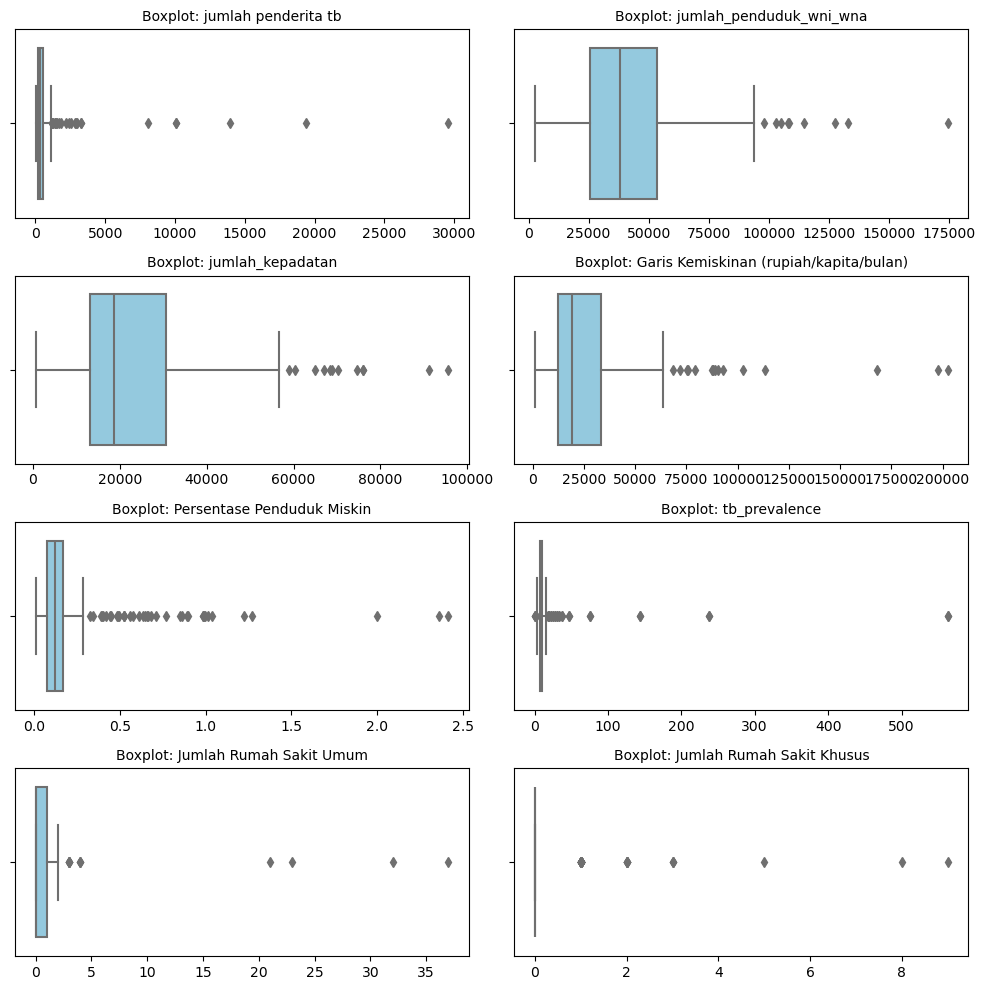

In [10]:
# Set ukuran figure
plt.figure(figsize=(10, 10))

# Looping untuk membuat subplot setiap fitur
for i, col in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.show()

#### Standarisasi data menggunakan RobustScaler karena tahan terhadap outlier

In [11]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#### Melihat korelasi antar fitur dengan correlation matrix

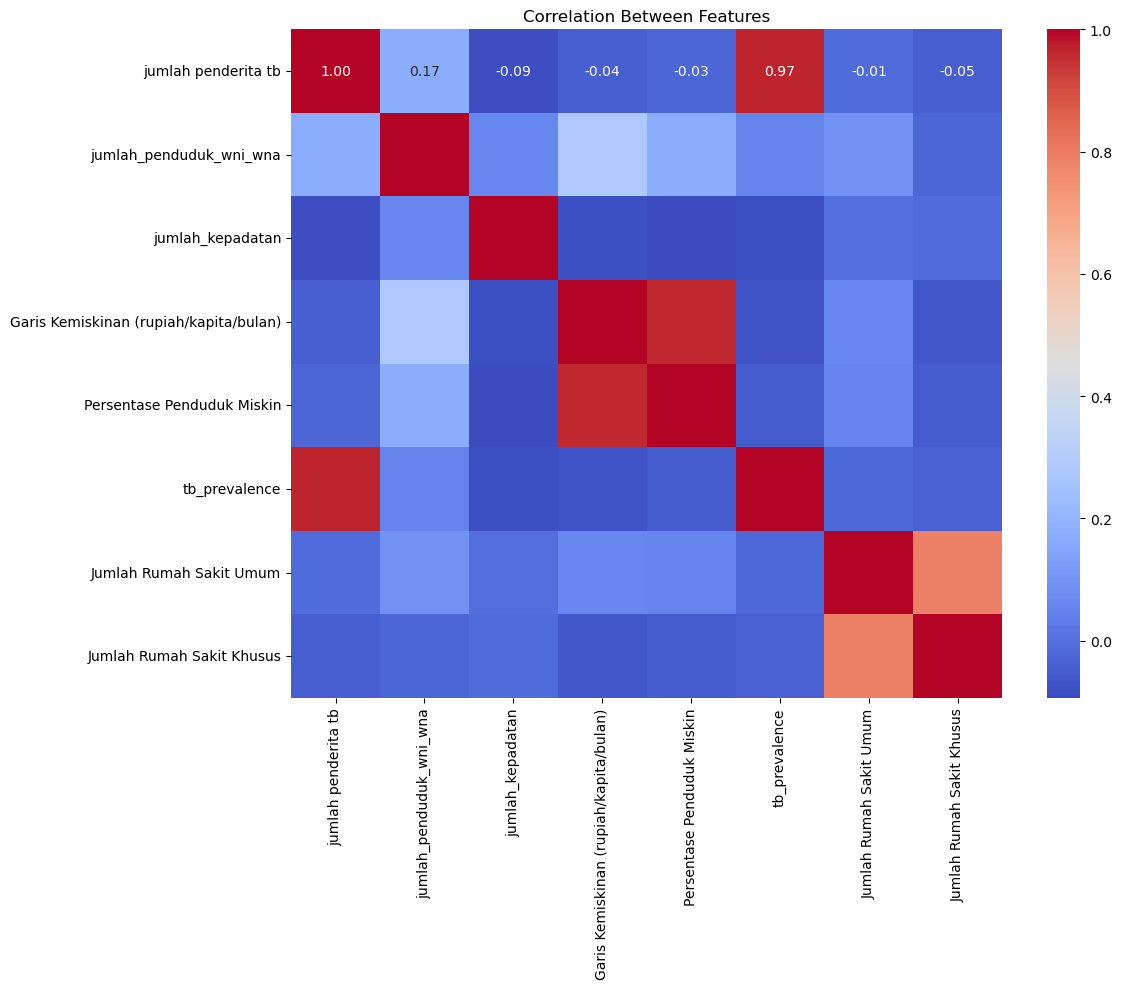

In [12]:
correlation = df[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

## Modeling

In [13]:
agglo = AgglomerativeClustering(distance_threshold=10, n_clusters=None, linkage='complete')
df['cluster'] = agglo.fit_predict(X_scaled)

#### Silhouette Score sebelum PCA

In [14]:
silhouette_agglo = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score (Before PCA): {silhouette_agglo:.4f}")

Silhouette Score (Before PCA): 0.6011


In [35]:
from sklearn.cluster import KMeans
# Find optimal number of clusters using the Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

print(f"Optimized Silhouette Score: {silhouette_scores}")

Optimized Silhouette Score: [0.9529000289401208, 0.8951063145279389, 0.6075716759590449, 0.6088708764818098, 0.6275149569357013, 0.6511992407287361, 0.594173588892218, 0.2585868364116179]


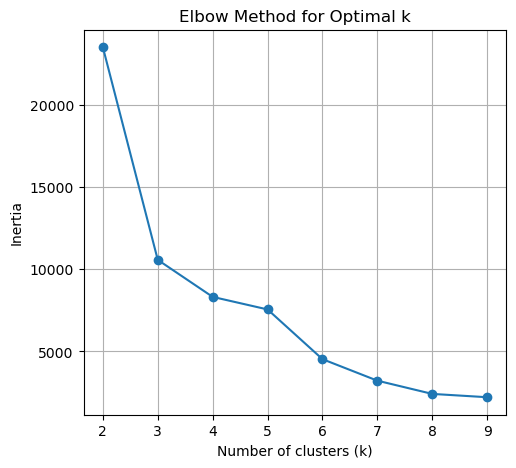

In [30]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

#### Mengurangi dimensi dengan menggunakan Principal Component Analysis

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### Menunjukkan fitur mana yang memiliki pengaruh terbesar dalam mengubah dimensi data

In [16]:
feature_importance = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])
feature_importance

,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Persentase Penduduk Miskin,tb_prevalence,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus
PC1,0.404872,0.004105,-0.004787,-0.005482,-0.010543,0.914258,-0.004888,-0.002455
PC2,0.040180,0.047868,-0.014483,0.178853,0.482810,-0.006516,0.838686,0.165391


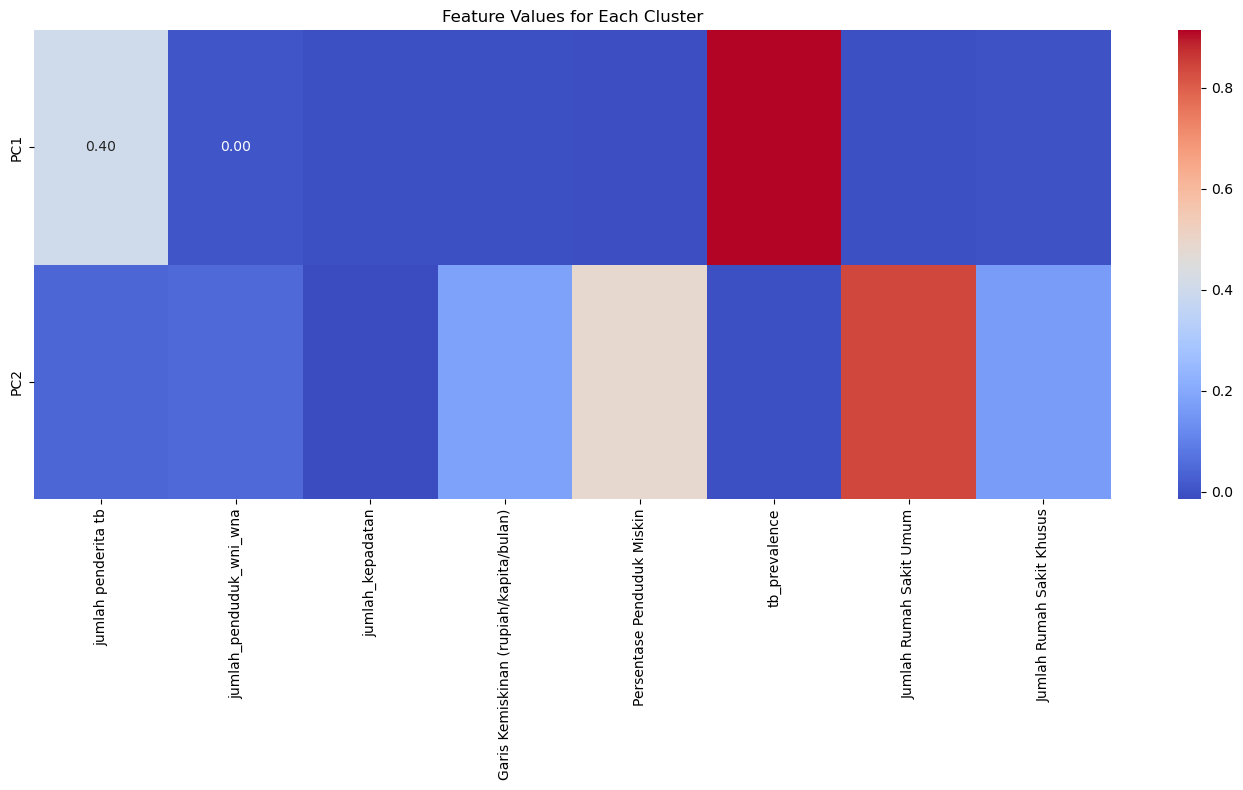

In [17]:
plt.figure(figsize=(14, 8))
sns.heatmap(feature_importance, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Values for Each Cluster')
plt.tight_layout()
plt.show()

In [18]:
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': df['cluster'],
    'District': df['nama_kecamatan'],
    'Subdistrict': df['nama_kelurahan'],
    'TB_Cases': df['jumlah penderita tb']
})

In [19]:
agglo = AgglomerativeClustering(distance_threshold=10, n_clusters=None, linkage='complete')
df['cluster'] = agglo.fit_predict(X_pca)

#### Silhouette Score setelah PCA

In [20]:
silhouette_agglo = silhouette_score(X_pca, df['cluster'])
print(f"Silhouette Score (PCA + Agglomerative Clustering): {silhouette_agglo:.4f}")

Silhouette Score (PCA + Agglomerative Clustering): 0.7511


In [37]:
# Find optimal number of clusters using the Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_pca, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

print(f"Optimized Silhouette Score: {silhouette_scores}")

Optimized Silhouette Score: [0.9648465068760769, 0.8064857456488095, 0.8516858447667035, 0.8540068430775161, 0.66020312593314, 0.6508787402895921, 0.6232314200098226, 0.5745499337749321]


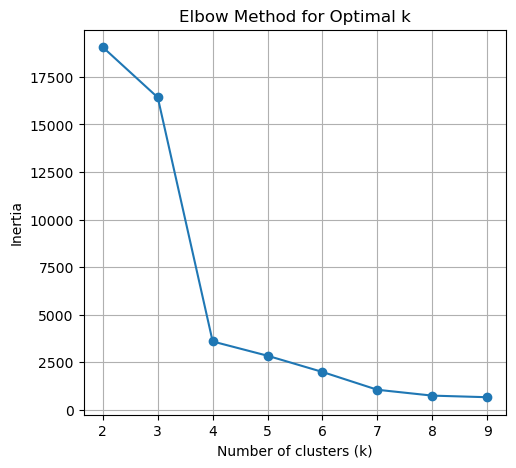

In [38]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

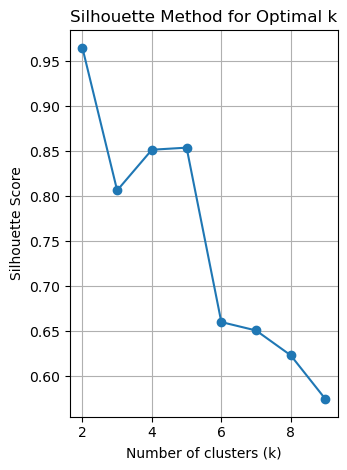

In [39]:
# Plot Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.cluster import DBSCAN
best_score = -1
best_params = {}
scores = []

# Iterasi kombinasi eps dan min_samples
for eps in np.arange(0.2, 2.0, 0.1):
    for min_samples in range(3, 10):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca)

        # Cek apakah ada lebih dari 1 cluster (bukan semuanya outlier)
        if len(set(labels)) > 1 and len(set(labels)) != len(set([0])):
            try:
                score = silhouette_score(X_pca, labels)
                scores.append((eps, min_samples, score))
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
            except:
                continue
print("Best DBSCAN Silhouette Score:", best_score)
print("Best Parameters: eps =", best_params['eps'], ", min_samples =", best_params['min_samples'])


Best DBSCAN Silhouette Score: 0.8664698629758781
Best Parameters: eps = 1.8000000000000005 , min_samples = 3


#### Menganalisa hasil clusterization yang telah dilakukan sebelumnya

In [21]:
cluster_analysis = df.groupby('cluster').agg({
    'jumlah target kasus tb': 'mean',
    'jumlah penderita tb': 'mean',
    'jumlah_penduduk_wni_wna': 'mean',
    'jumlah_kepadatan': 'mean',
    'Garis Kemiskinan (rupiah/kapita/bulan)': 'mean',
    'Persentase Penduduk Miskin': 'mean',
    'tb_prevalence': 'mean',
    'tb_detection_rate': 'mean',
    'Jumlah Rumah Sakit Umum': 'mean',
    'Jumlah Rumah Sakit Khusus': 'mean'
}).reset_index()

# Ubah nama kolom agar lebih bersih
cluster_analysis.columns = ['cluster', 'target_tb', 'penderita_tb', 'penduduk', 'kepadatan',
                            'garis_kemiskinan', 'persen_miskin', 'tb_prevalence',
                            'tb_detection_rate', 'rs_umum', 'rs_khusus']

#### Jumlah data per cluster

In [22]:
unique, counts = np.unique(df['cluster'], return_counts=True)
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 243 data points
Cluster 1: 3 data points
Cluster 2: 4 data points
Cluster 3: 9 data points
Cluster 4: 2 data points
Cluster 5: 2 data points
Cluster 6: 1 data points
Cluster 7: 2 data points
Cluster 8: 1 data points


#### Visualisasi distribusi data per cluster

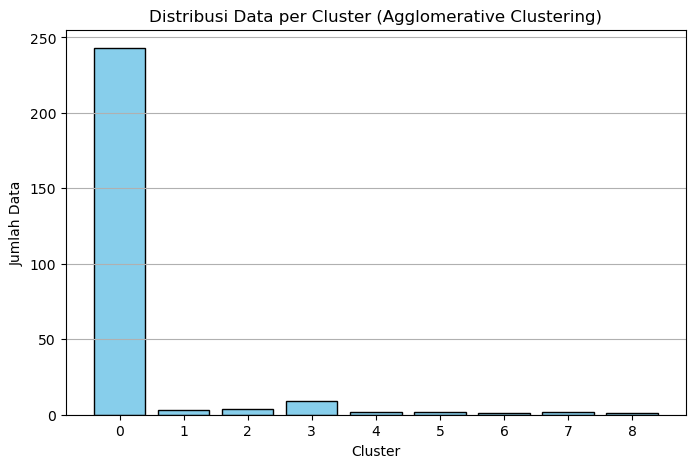

Cluster 0: 243 data points
Cluster 1: 3 data points
Cluster 2: 4 data points
Cluster 3: 9 data points
Cluster 4: 2 data points
Cluster 5: 2 data points
Cluster 6: 1 data points
Cluster 7: 2 data points
Cluster 8: 1 data points


In [23]:
unique, counts = np.unique(df['cluster'], return_counts=True)

# Plot distribusi cluster
plt.figure(figsize=(8,5))
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Distribusi Data per Cluster (Agglomerative Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.xticks(unique)
plt.grid(axis='y')
plt.show()

# Print manual jumlah per cluster juga
unique, counts = np.unique(df['cluster'], return_counts=True)
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} data points")


In [24]:
Agglo_cluster_summary = df.groupby("cluster").mean(numeric_only=True)
Agglo_cluster_counts = df["cluster"].value_counts().sort_index()
Agglo_cluster_summary["Count"] = Agglo_cluster_counts
Agglo_cluster_summary

,jumlah target kasus tb,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Jumlah Penduduk Miskin (ribu),Persentase Penduduk Miskin,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,tb_prevalence,tb_detection_rate,Count
cluster,,,,,,,,,,,,
0,1766.460905,394.814815,41293.012346,24013.958848,25374.884975,3.879400,0.192674,0.530864,0.218107,9.193459,0.225389,243
1,2560.333333,705.333333,58549.666667,29889.333333,48420.448377,9.464303,0.483623,30.666667,6.333333,10.668058,0.238493,3
2,623.500000,141.250000,26180.000000,10658.500000,146228.985943,1.224928,1.723031,5.500000,1.250000,2.389173,0.127620,4
3,9751.888889,2345.222222,70199.888889,25705.888889,4811.065284,0.900238,0.033865,0.777778,0.111111,35.683997,0.240473,9
4,37605.000000,9044.000000,62961.000000,14766.500000,15015.343625,2.809645,0.105694,0.500000,0.000000,143.644166,0.240499,2
5,49887.000000,11997.500000,50366.500000,12940.000000,11618.906015,2.174109,0.081786,0.000000,0.000000,238.202976,0.240492,2
6,80504.000000,19360.000000,34389.000000,7510.000000,30567.561750,5.719748,0.215166,1.000000,0.000000,562.970717,0.240485,1
7,10675.500000,2567.000000,33934.500000,33425.500000,12661.384425,2.369176,0.089124,0.000000,0.500000,75.644816,0.240455,2
8,123030.000000,29588.000000,52555.000000,11471.000000,4895.918665,0.916116,0.034463,0.000000,0.000000,562.991152,0.240494,1


## Visualisasi Cluster

#### Distribusi regional cluster

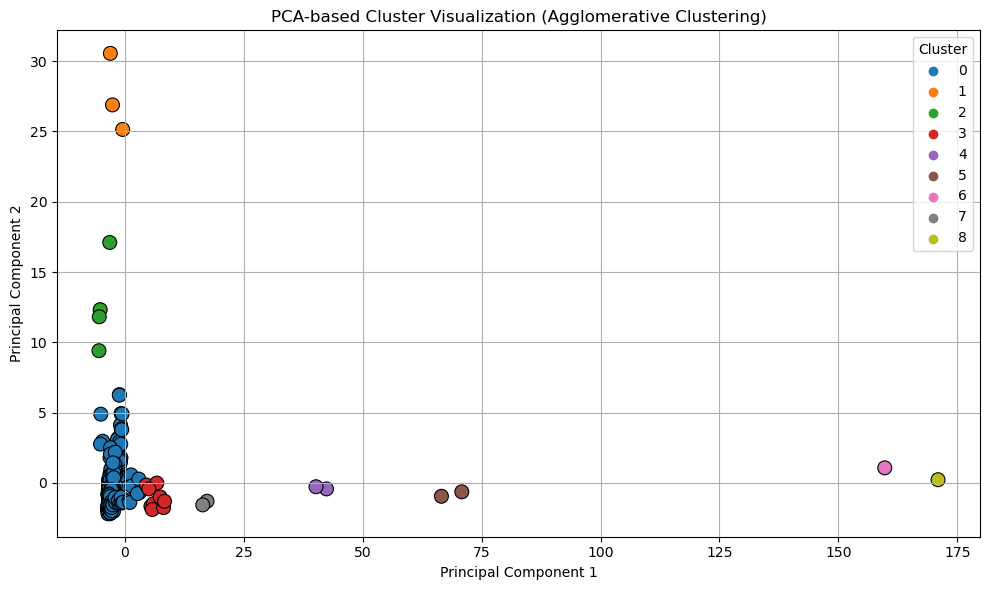

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster', palette='tab10', s=100, edgecolor='k')
plt.title('PCA-based Cluster Visualization (Agglomerative Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

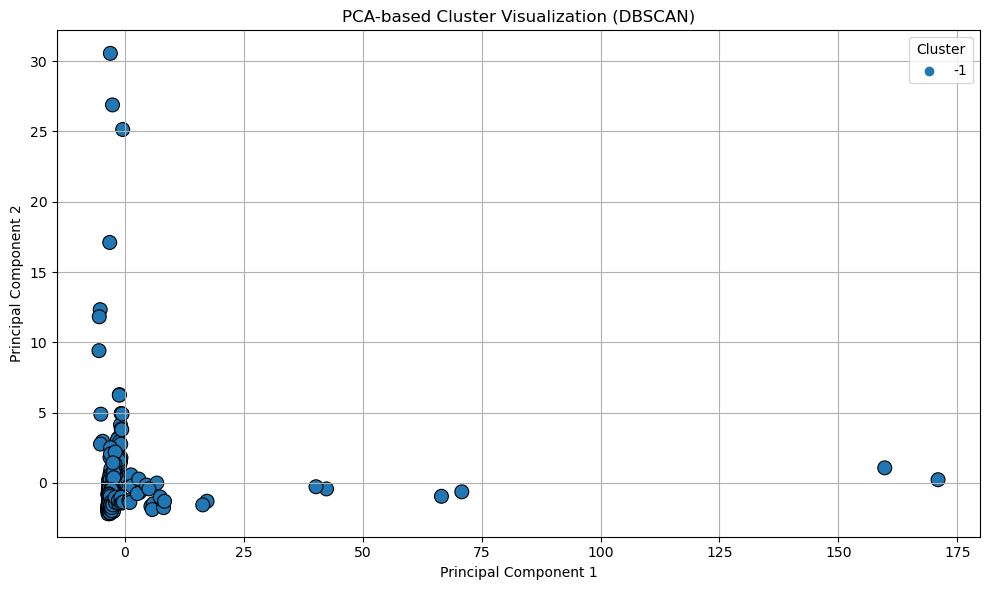

In [41]:
# === 2. DBSCAN dengan parameter terbaik ===
dbscan = DBSCAN(eps=1.8, min_samples=3)
labels_dbscan = dbscan.fit_predict(X)

# === 3. Simpan ke DataFrame ===
df['dbscan'] = labels_dbscan

# === 4. Plot visualisasi cluster ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=df['dbscan'].astype(str),  # agar -1 ditampilkan
    palette='tab10', 
    s=100, 
    edgecolor='k'
)
plt.title('PCA-based Cluster Visualization (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

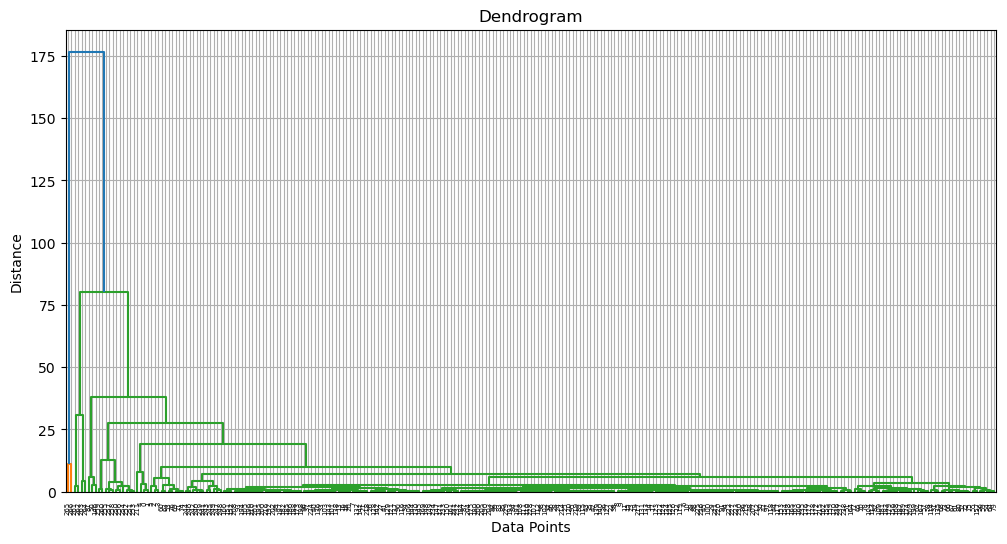

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming X_pca is your dimensionality-reduced data (e.g., from PCA)
linked = linkage(X_pca, method='complete')  # or 'ward', 'average', 'single'

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, distance_sort='ascending')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


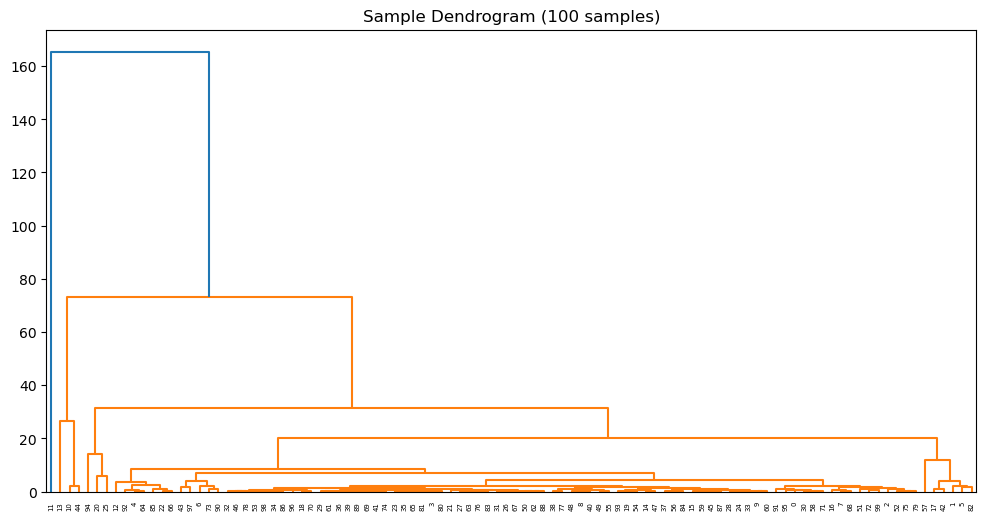

In [27]:
# Optional: plot for a sample to make it more readable
sample_idx = np.random.choice(X_pca.shape[0], size=100, replace=False)
linked_sample = linkage(X_pca[sample_idx], method='complete')

plt.figure(figsize=(12, 6))
dendrogram(linked_sample, distance_sort='ascending', show_leaf_counts=True)
plt.title('Sample Dendrogram (100 samples)')
plt.show()
